In [1]:
import torch
from torch import nn, device
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from multiclass_functions import *

In [2]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


In [3]:
BATCH_SIZE = 64
transform = transforms.ToTensor()
train_DS = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_DS = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
train_DL = torch.utils.data.DataLoader(dataset=train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(dataset=test_DS, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


50000 10000
torch.Size([64, 3, 32, 32])
torch.Size([64])
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
bird


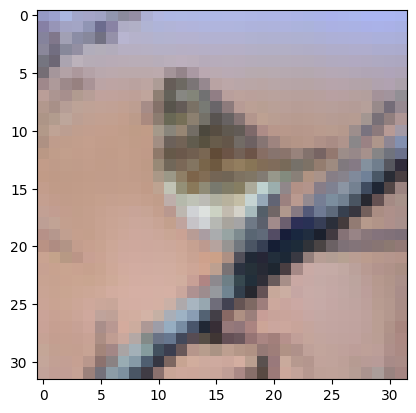

In [4]:
print(len(train_DS), len(test_DS))
x_batch, y_batch = next(iter(test_DL))
print(x_batch.shape)
print(y_batch.shape)
print(train_DS.class_to_idx)

plt.imshow(x_batch[0].permute(1, 2, 0))
print(test_DS.classes[y_batch[0]])

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 =nn.Sequential(nn.Conv2d(3,8,3, padding=1),
                                  nn.BatchNorm2d(8),
                                  nn.ReLU())
        self.Maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 =nn.Sequential(nn.Conv2d(8,16,3, padding=1),
                                  nn.BatchNorm2d(16),
                                  nn.ReLU())
        self.Maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 =nn.Sequential(nn.Conv2d(16,32,3, padding=1),
                                  nn.BatchNorm2d(32),
                                  nn.ReLU())
        self.Maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.fc = nn.Linear(512, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.Maxpool1(x)
        x = self.conv2(x)
        x = self.Maxpool2(x)
        x = self.conv3(x)
        x = self.Maxpool3(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc(x)
                
        return x    
    
    
class CNN_deep(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv_block1 = nn.Sequential(nn.Conv2d(3,32,3, padding=1),
                                        nn.BatchNorm2d(32),
                                        nn.ReLU(),
                                        nn.Conv2d(32,32,3, padding=1),
                                        nn.BatchNorm2d(32),
                                        nn.ReLU())
        self.Maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv_block2 = nn.Sequential(nn.Conv2d(32,64,3, padding=1),
                                        nn.BatchNorm2d(64),
                                        nn.ReLU(),
                                        nn.Conv2d(64,64,3, padding=1),
                                        nn.BatchNorm2d(64),
                                        nn.ReLU(),
                                        nn.Conv2d(64,64,3, padding=1),
                                        nn.BatchNorm2d(64),
                                        nn.ReLU())
        self.Maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv_block3 = nn.Sequential(nn.Conv2d(64,128,3, padding=1),
                                        nn.BatchNorm2d(128),
                                        nn.ReLU(),
                                        nn.Conv2d(128,128,3, padding=1),
                                        nn.BatchNorm2d(128),
                                        nn.ReLU(),
                                        nn.Conv2d(128,128,3, padding=1),
                                        nn.BatchNorm2d(128),
                                        nn.ReLU())
        self.Maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        self.fc = nn.Sequential(nn.Linear(2048,512),
                                nn.Linear(512, 10))
    
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.Maxpool1(x)
        x = self.conv_block2(x)
        x = self.Maxpool2(x)
        x = self.conv_block3(x)
        x = self.Maxpool3(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc(x)
                
        return x    
        
        

In [6]:
x = torch.randn(32,3,32,32)
model = CNN_deep()
print(model(x).shape)
print(torch.argmax(model(x), dim=1))

torch.Size([32, 10])
tensor([5, 5, 5, 2, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 4, 5, 5, 5,
        5, 5, 4, 4, 5, 4, 5, 5])


In [7]:
EPOCHS = 30
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [8]:
loss_hist = Train(model=model, train_DL=train_DL, optimizer=optimizer, criterion=criterion, EPOCH=EPOCHS)

DEVICE: cuda
Epoch 1/30, Loss: 1.581
--------------------
Epoch 2/30, Loss: 0.978
--------------------
Epoch 3/30, Loss: 0.753
--------------------
Epoch 4/30, Loss: 0.627
--------------------
Epoch 5/30, Loss: 0.537
--------------------
Epoch 6/30, Loss: 0.458
--------------------
Epoch 7/30, Loss: 0.396
--------------------
Epoch 8/30, Loss: 0.339
--------------------
Epoch 9/30, Loss: 0.292
--------------------
Epoch 10/30, Loss: 0.237
--------------------
Epoch 11/30, Loss: 0.208
--------------------
Epoch 12/30, Loss: 0.17
--------------------
Epoch 13/30, Loss: 0.156
--------------------
Epoch 14/30, Loss: 0.124
--------------------
Epoch 15/30, Loss: 0.108
--------------------
Epoch 16/30, Loss: 0.102
--------------------
Epoch 17/30, Loss: 0.088
--------------------
Epoch 18/30, Loss: 0.079
--------------------
Epoch 19/30, Loss: 0.08
--------------------
Epoch 20/30, Loss: 0.072
--------------------
Epoch 21/30, Loss: 0.069
--------------------
Epoch 22/30, Loss: 0.059
-------

In [ ]:
model_save_path = "./CNN.pth"
torch.save(model.state_dict(), model_save_path)

In [ ]:
load_model = CNN_deep().to(DEVICE)
load_model.load_state_dict(torch.load(model_save_path))

In [ ]:
Test(load_model, test_DL)

In [ ]:
Test_plot(load_model, test_DL)

In [10]:
import json
with open('/purestorage/OCR/Documents_dataset/RecogDataset_docu/Validation/annotation.json', 'r') as f:
    data = json.load(f)

print(len(data['data_list']))

1339179
